In [2]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline


class neutralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        self.activation_function = lambda x: scipy.special.expit(x)

    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin = 2).T
        targets = numpy.array(targets_list, ndmin = 2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))

    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

input_nodes = 784
hidden_nodes = 200
output_nodes = 10
learning_rate = 0.1

n = neutralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

def main():
    training_data_file = open("/Users/gankutsuou/Desktop/mnist/mnist_train.csv", 'r')
    training_data_lists = training_data_file.readlines()
    training_data_file.close()
    for e in range(0, 5):
        for record in training_data_lists:
            all_values = record.split(',')
            inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            targets = numpy.zeros(output_nodes) + 0.01
            targets[int(all_values[0])] = 0.99
            n.train(inputs, targets)
            pass
        pass

    test_data_file = open("/Users/gankutsuou/Desktop/mnist/mnist_test.csv", 'r')
    test_data_lists = test_data_file.readlines()
    test_data_file.close()
    scorecard = []
    for record in test_data_lists:
        all_values = record.split(',')
        correct_label = int(all_values[0])
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        outputs = n.query(inputs)
        label = numpy.argmax(outputs)
        if(label == correct_label):
            scorecard.append(1)
        else:
            scorecard.append(0)
            pass
        pass

if __name__ == '__main__':
    main()


In [3]:
test_data_file = open("/Users/gankutsuou/Desktop/mnist/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()
all_values = test_data_list[0].split(',')
print(all_values[0])

7


In [4]:
image_array = numpy.asfarray(all_values[1:], reshape((28, 28)))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

NameError: name 'reshape' is not defined

In [5]:
image_array = numpy.asfarray(all_values[1:].reshape((28, 28)))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

AttributeError: 'list' object has no attribute 'reshape'

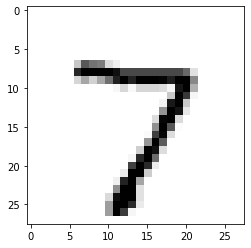

In [6]:
image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [7]:
test_data_file = open("/Users/gankutsuou/Desktop/mnist/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()
all_values = test_data_list[3].split(',')
print(all_values[0])

0


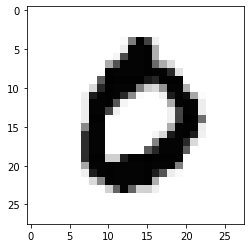

In [8]:
image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [9]:
test_data_file = open("/Users/gankutsuou/Desktop/mnist/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()
all_values = test_data_list[5].split(',')
print(all_values[0])

1


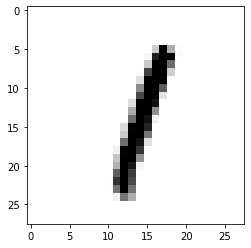

In [10]:
image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')